<a href="https://colab.research.google.com/github/Malek1Alk7alil2/Quiz1/blob/main/machine_learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats.distributions as dist
from scipy.stats import ttest_1samp
from scipy import stats

In [ ]:
df = pd.read_csv("/content/project_2_data.csv")

In [ ]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df['GarageFinish'].info()

df['GarageFinish'].describe()

df['GarageFinish'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageFinish
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


,count
GarageFinish,
Unf,605
RFn,422
Fin,352
0,81


In [ ]:
df['SalePrice'].info()

df['SalePrice'].describe()

df['SalePrice'].value_counts()


<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


,count
SalePrice,
140000,20
135000,17
155000,14
145000,14
190000,13
...,...
202665,1
164900,1
208300,1


H0 =

In [ ]:
sale_by_GarageFinish = df[['SalePrice', 'GarageFinish']].groupby('GarageFinish').agg([np.mean, np.std, np.size])
sale_by_GarageFinish.columns = ['mean', 'std', 'size']
sale_by_GarageFinish

<ipython-input-5-081eed823373>:1: FutureWarning: The provided callable <function mean at 0x797979cf8310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sale_by_GarageFinish = df[['SalePrice', 'GarageFinish']].groupby('GarageFinish').agg([np.mean, np.std, np.size])
<ipython-input-5-081eed823373>:1: FutureWarning: The provided callable <function std at 0x797979cf8430> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  sale_by_GarageFinish = df[['SalePrice', 'GarageFinish']].groupby('GarageFinish').agg([np.mean, np.std, np.size])


,mean,std,size
GarageFinish,,,
0,103317.283951,32815.023389,81
Fin,240052.690341,96960.593232,352
RFn,202068.869668,63536.222518,422
Unf,142156.423140,46498.528211,605


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# افتراض أن 'data' هو DataFrame الخاص بك ويحتوي على أعمدة 'SalePrice' و 'GarageFinish'
model = ols('SalePrice ~ GarageFinish', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                    sum_sq      df           F         PR(>F)
GarageFinish  2.816458e+12     3.0  213.867028  6.228747e-115
Residual      6.391453e+12  1456.0         NaN            NaN


In [ ]:
import scipy.stats as stats


stat, p = stats.kruskal(df['SalePrice'][df['GarageFinish'] == 'Fin'],
                        df['SalePrice'][df['GarageFinish'] == 'RFn'],
                        df['SalePrice'][df['GarageFinish'] == 'Unf'])
print(f'Kruskal-Wallis Test {stat} , {p}')


Kruskal-Wallis Test 505.2078115404239 , 1.9747749828598703e-110


In [ ]:

stat, p = stats.mannwhitneyu(df['SalePrice'][df['GarageFinish'] == 'Fin'],
                             df['SalePrice'][df['GarageFinish'] == 'RFn'])
print(f'winty-Wallis Test {stat} , {p}')


winty-Wallis Test 91466.5 , 2.835723420996296e-08


In [ ]:
from itertools import combinations

groups = df.groupby('GarageFinish')['SalePrice'].apply(list)
comparisons = list(combinations(groups.keys(), 2))

p_values = []
for (group1, group2) in comparisons:
    u_stat, p_val = stats.mannwhitneyu(groups[group1], groups[group2])
    p_values.append(p_val)
    print(f"Comparison between {group1} and {group2}: U-statistic: {u_stat}, p-value: {p_val}")

print('\n')
print("All p-values:", p_values)



corrected_p_values = [p * len(comparisons) for p in p_values]
print('\n')
print(f"Corrected p-values: {corrected_p_values}")

Comparison between 0 and Fin: U-statistic: 926.5, p-value: 2.3356929499160963e-39
Comparison between 0 and RFn: U-statistic: 1711.5, p-value: 1.0383801959969931e-37
Comparison between 0 and Unf: U-statistic: 10890.0, p-value: 4.403818405764864e-16
Comparison between Fin and RFn: U-statistic: 91466.5, p-value: 2.835723420996296e-08
Comparison between Fin and Unf: U-statistic: 186343.5, p-value: 1.4069820134695049e-83
Comparison between RFn and Unf: U-statistic: 209770.5, p-value: 5.114215812781316e-69


All p-values: [2.3356929499160963e-39, 1.0383801959969931e-37, 4.403818405764864e-16, 2.835723420996296e-08, 1.4069820134695049e-83, 5.114215812781316e-69]


Corrected p-values: [1.4014157699496577e-38, 6.230281175981959e-37, 2.6422910434589184e-15, 1.7014340525977776e-07, 8.441892080817029e-83, 3.06852948766879e-68]


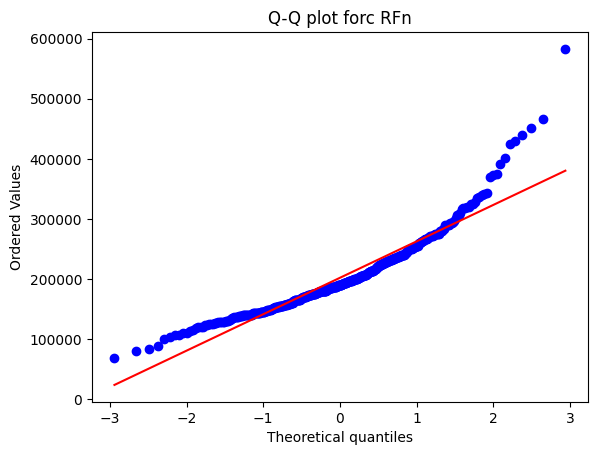

*******************************
Shirpo-Wilk test for RFn : p-value = 1.327268550256758e-15

*******************************


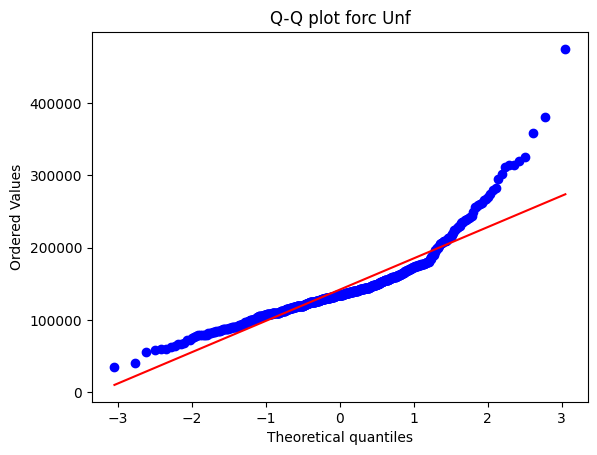

*******************************
Shirpo-Wilk test for Unf : p-value = 1.1445413317550934e-22

*******************************


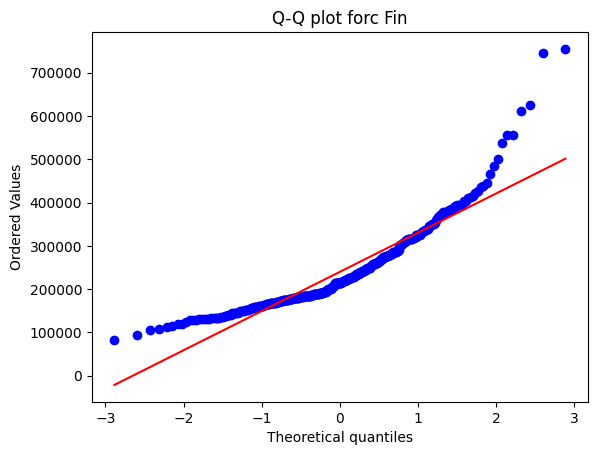

*******************************
Shirpo-Wilk test for Fin : p-value = 6.949006585713458e-17

*******************************


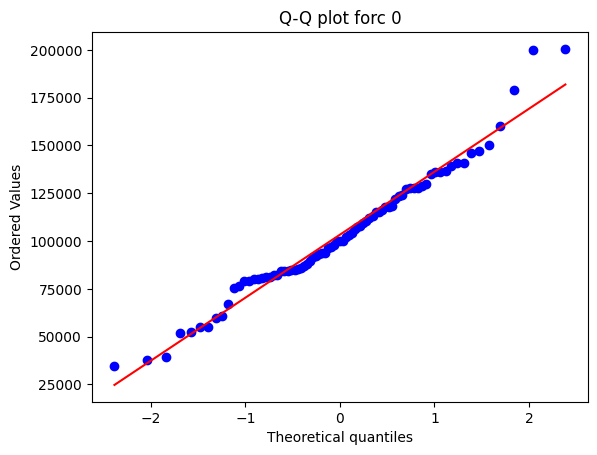

*******************************
Shirpo-Wilk test for 0 : p-value = 0.08193631847430918

*******************************


In [ ]:
from scipy import stats # import stats module


for cat in df['GarageFinish'].unique():
  data = df[df['GarageFinish'] == cat]['SalePrice']
  stats.probplot(data, dist='norm', plot=plt)
  plt.title(f'Q-Q plot forc {cat}')
  plt.show()
  statistic, p = stats.shapiro(data)
  print('*******************************', end='\n')

  print(f'Shirpo-Wilk test for {cat} : p-value = {p}')

  print('\n*******************************')




In [ ]:
import scipy.stats as stats

stats, p = stats.levene(df[df['GarageFinish'] == 'RFn']['SalePrice'],
                        df[df['GarageFinish'] == 'Unf']['SalePrice'])

print(f'Levene test : p-value = {p}')



Levene test : p-value = 6.310869926914553e-09


In [ ]:
import scipy.stats as stats

def check_normality(data):
  stat, p = stats.shapiro(data)
  print(f'Statistics {stat} , p {p}')
  alpha = 0.05
  if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    print('Sample does not look Gaussian (reject H0)')


# Example: Check normality for SalePrice
check_normality(df['SalePrice'])


# Check for homogeneity of variances using Levene's test
# You need to specify the groups you want to compare

# Example: Assuming you want to compare SalePrice across different GarageFinish categories
# Replace 'GarageFinish' with your actual grouping variable
# You might need to filter out rows with missing values in the grouping variable

# groups = df.groupby('GarageFinish')['SalePrice'].apply(list)
# stats.levene(*groups)

# Or use Bartlett's test, which is more sensitive to departures from normality
# stats.bartlett(*groups)

# Interpret the p-value:
# If p > 0.05, variances are equal (fail to reject H0)
# If p < 0.05, variances are not equal (reject H0)

# Note:
# - These tests are sensitive to sample size and outliers.
# - If normality or homogeneity of variance assumptions are violated, you might consider using non-parametric alternatives to ANOVA, such as the Kruskal-Wallis test.


Statistics 0.8696714665902145 , p 3.2061412312021656e-33
Sample does not look Gaussian (reject H0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df['GrLivArea'].value_counts()

,count
GrLivArea,
864,22
1040,14
894,11
1456,10
848,10
...,...
2296,1
1123,1
1199,1


In [ ]:
correlation_with_saleprice = df.corr(numeric_only=True) # Calculate correlation only for numeric columns
correlation_with_saleprice = correlation_with_saleprice['SalePrice'].sort_values(ascending=False)
print(correlation_with_saleprice)

model = sm.OLS.from_formula('SalePrice ~ GrLivArea ', data=df)
result = model.fit()
print(result.summary())

SalePrice         1.000000
sqrtSalePrice     0.986806
LogSalePrice      0.948374
Interaction       0.868357
OverallQual       0.790982
LogOverAllQual    0.732961
sqrtGrLivArea     0.708765
GrLivArea         0.708624
logGrLivArea      0.695118
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
MasVnrArea        0.472614
Fireplaces        0.466929
BsmtFinSF1        0.386420
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
GarageYrBlt       0.261366
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
LotFrontage       0.209624
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
I

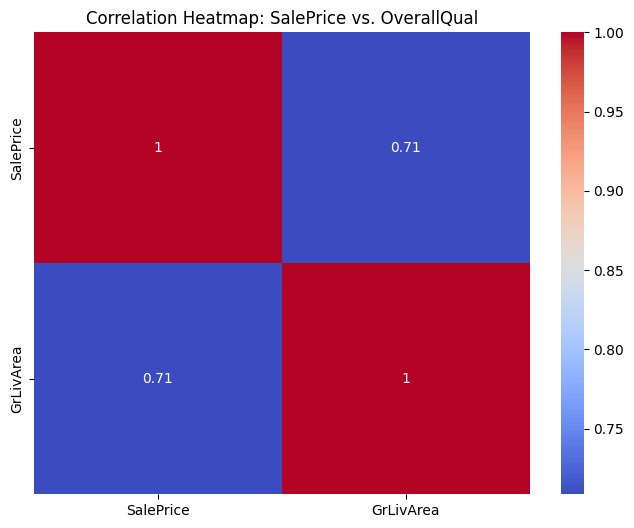

In [ ]:
# prompt: create heatmap between SalePrice and OverallQual

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(df[['SalePrice', 'GrLivArea']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: SalePrice vs. OverallQual')
plt.show()


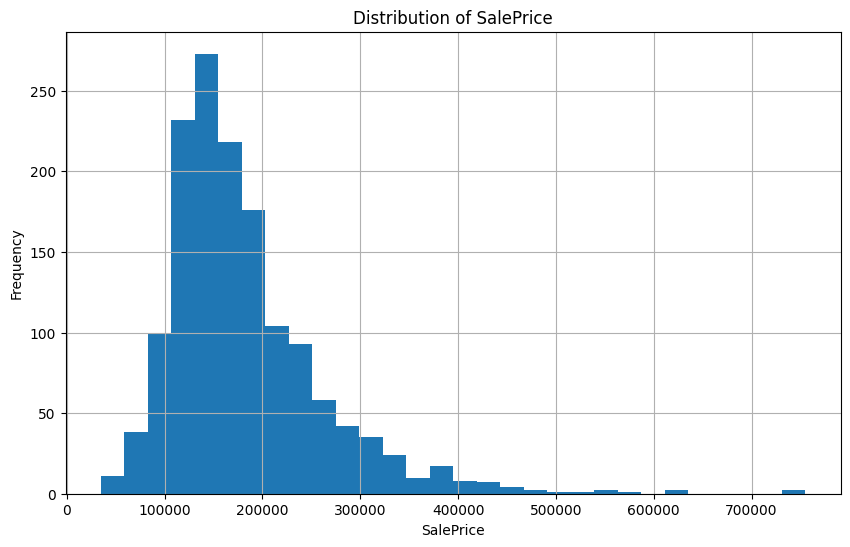

In [ ]:
plt.figure(figsize=(10, 6))
df['SalePrice'].hist(bins=30)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()

In [ ]:
X = df[['GrLivArea']]
y = df[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("a = ", model.coef_)
print("b = ",model.intercept_)

a =  [[104.59861598]]
b =  [21987.9290004]


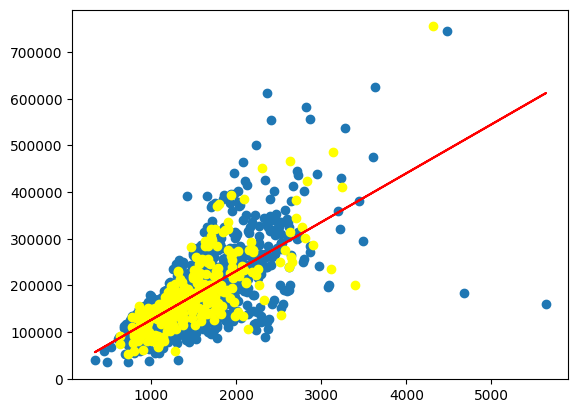

In [ ]:
w = model.coef_[0][0]
b = model.intercept_[0]

y_model = w * X_train + b

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='yellow')
plt.plot(X_train, y_model, color='red')
plt.show()

In [ ]:
y_hat = model.predict(X_test)
y_hat

array([[112361.13320347],
       [186521.5519303 ],
       [133803.84947851],
       [135582.02595009],
       [223758.65921768],
       [202734.33740654],
       [179095.05019602],
       [214240.18516388],
       [185475.56577054],
       [242900.20594124],
       [154932.76990561],
       [125226.76296849],
       [195935.42736812],
       [170727.16091796],
       [202002.14709471],
       [226269.02600109],
       [105666.82178102],
       [117381.86677031],
       [179827.24050785],
       [167275.40659075],
       [212357.41007632],
       [186103.1574664 ],
       [143845.31661218],
       [172296.14015759],
       [141439.54844474],
       [164765.03980734],
       [150016.63495475],
       [153991.38236183],
       [206709.08481362],
       [122193.40310519],
       [136209.61764595],
       [152736.19897012],
       [130770.48961521],
       [173132.9290854 ],
       [209847.0432929 ],
       [183174.39621907],
       [142276.33737254],
       [152736.19897012],
       [1806

In [ ]:
error = y_test - y_hat
error

,SalePrice
1294,2638.866797
1358,-9021.551930
1421,-6303.849479
808,24367.974050
641,2241.340782
...,...
177,-50317.271674
601,-24811.025967
479,-50817.963669
15,20684.852956


In [ ]:
x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          1.263e+04
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                        0.00
Time:                        13:13:44   Log-Likelihood:                         -14453.
No. Observations:                1168   AIC:                                  2.891e+04
Df Residuals:                    1167   BIC:                                  2.891e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

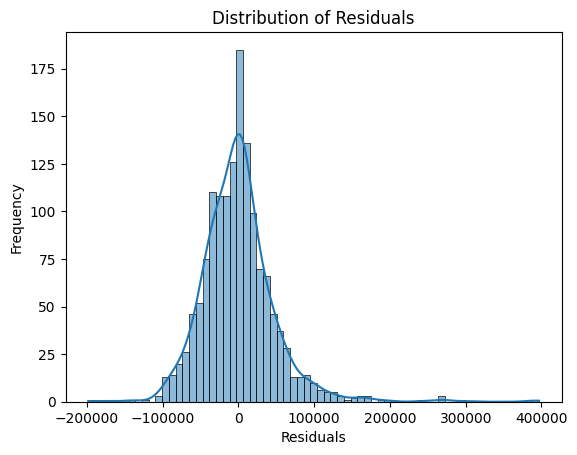

In [ ]:
residuals = result.resid
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

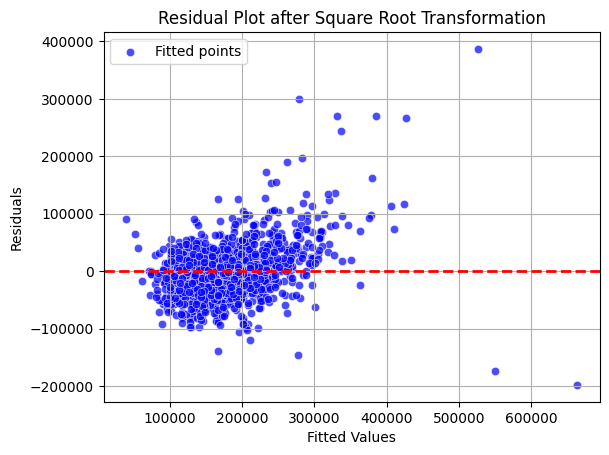

In [ ]:
sns.scatterplot(x = model.fittedvalues, y = residuals, alpha = 0.7, label = 'Fitted points', color = 'b')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot after Square Root Transformation')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import statsmodels.api as sm

# حساب الأوزان
weights = 1 / (residuals ** 2)

# نموذج الانحدار الموزون
model = sm.WLS(y, X, weights=weights).fit()
print(model.summary())


                                 WLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.933
Model:                            WLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          2.025e+04
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                        0.00
Time:                        13:13:55   Log-Likelihood:                         -22805.
No. Observations:                1460   AIC:                                  4.561e+04
Df Residuals:                    1459   BIC:                                  4.562e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
model = sm.RLM(y, X).fit()
print(model.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            RLM   Df Residuals:                     1459
Method:                          IRLS   Df Model:                            0
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 20 Sep 2024                                         
Time:                        13:14:08                                         
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea    117.2455      0.711    164.829      0.0

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# افترض أن لديك بيانات في DataFrame يسمى df
# تأكد من أن df يحتوي على الأعمدة 'SalePrice' و 'OverAllQual'

# إعداد المتغيرات
X = df[['SalePrice']]
X = sm.add_constant(X)  # إضافة ثابت للنموذج
y = df[['GrLivArea']]



# ملائمة نموذج الانحدار الخطي
model = sm.OLS(y, X).fit()

# إجراء اختبار برنيش باجان
bp_test = het_breuschpagan(model.resid, model.model.exog)


# عرض النتائج
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))
print(results)


{'Lagrange multiplier statistic': 3.8354865546252426, 'p-value': 0.05017842533086007, 'f-value': 3.8403211622100772, 'f p-value': 0.05022421035922031}


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid

# Perform Breusch-Pagan test
test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, test)))


{'Lagrange multiplier statistic': 3.8354865546252426, 'p-value': 0.05017842533086007, 'f-value': 3.8403211622100772, 'f p-value': 0.05022421035922031}


In [ ]:
print("MAE = ", mean_absolute_error(y_test, y_hat))
print("MSE = ", mean_squared_error(y_test, y_hat))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_hat)))

MAE =  36389.38499672626
MSE =  2801540810.2076535
RMSE =  52929.58350684099


In [ ]:
# prompt: Create confidence interval to SalePrice

import statsmodels.stats.api as sms

# Assuming you have your 'SalePrice' data in a variable called 'df['SalePrice']'
confidence_interval = sms.DescrStatsW(df['SalePrice']).tconfint_mean()

print(f"95% Confidence Interval for SalePrice: {confidence_interval}")


95% Confidence Interval for SalePrice: (176842.84104108496, 184999.55073973694)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = sm.OLS(y, X_poly).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              GrLivArea   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     755.4
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          8.30e-226
Time:                        13:16:02   Log-Likelihood:                -10698.
No. Observations:                1460   AIC:                         2.140e+04
Df Residuals:                    1457   BIC:                         2.142e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.1808     14.601     11.450      0.0

In [ ]:
model = sm.RLM(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              GrLivArea   No. Observations:                 1460
Model:                            RLM   Df Residuals:                     1458
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 20 Sep 2024                                         
Time:                        13:16:33                                         
No. Iterations:                    12                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        614.9270     20.909     29.410      0.000     573.947     655.907
SalePrice      0.0048      0.000     45.594      0.000       0.005       0.005
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""